In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

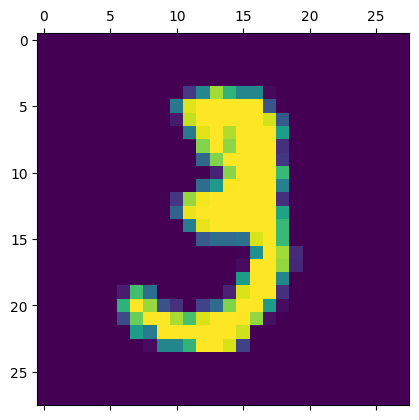

In [3]:
plt.matshow(X_train[10])

In [4]:
# Scaling the values down to improve the accuracy
X_train = X_train/255
X_test = X_test/255

In [5]:
# Flattening the input arrays
X_train_flattened =  X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4724 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3045 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2837 - accuracy: 0.9198
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2668 - accuracy: 0.9263


In [7]:
# Running the model on the test dataset
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9265


[0.26579228043556213, 0.9265000224113464]

In [9]:
result = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [10]:
result

array([[2.2587033e-02, 2.4733723e-07, 5.4206260e-02, ..., 9.9981886e-01,
        9.4287731e-02, 5.5027807e-01],
       [3.5308704e-01, 6.0163233e-03, 9.9937701e-01, ..., 1.1727875e-12,
        1.9038613e-01, 2.4322067e-09],
       [3.4980895e-04, 9.9342948e-01, 6.5166086e-01, ..., 1.2406543e-01,
        3.5766077e-01, 3.9851855e-02],
       ...,
       [2.7082522e-06, 3.5438441e-06, 1.2322718e-03, ..., 2.1762906e-01,
        5.8890021e-01, 7.0506799e-01],
       [8.4109452e-05, 1.2462151e-04, 1.1503776e-04, ..., 3.3984481e-05,
        6.0965538e-01, 8.9611807e-05],
       [5.4094722e-03, 3.1722303e-10, 2.5003713e-01, ..., 2.8323234e-08,
        2.8418042e-04, 4.7527899e-07]], dtype=float32)

In [13]:
# Returns the index which has the mix value
np.argmax(result[0])

7

In [17]:
y_predicted_labels = [np.argmax(i) for i in result]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

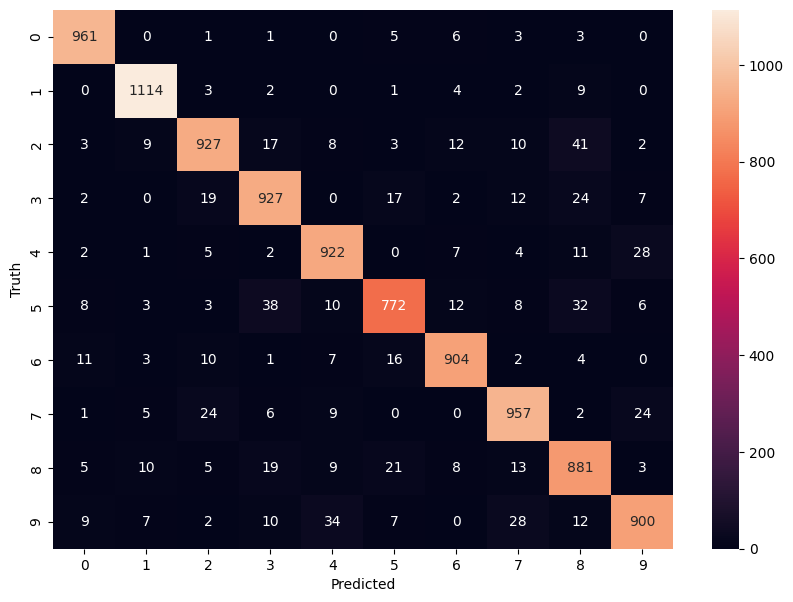

In [21]:
# Code for visualising the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
# Now adding another layer of neurons

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'), # This is hidden layer
    keras.layers.Dense(10,activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1741/1875 [==========================>...] - ETA: 0s - loss: 0.2805 - accuracy: 0.9210

KeyboardInterrupt: ignored

In [24]:
# Now if the input is not flattened
# Now adding another layer of neurons

model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'), # This is hidden layer
    keras.layers.Dense(10,activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2737 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1233 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0880 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9833
